# **Image Classification Model Deployment : Translated Animals10 **
by : Bayu Alansyah

## **Dataset** 
Dataset from Kaggle : [translated_animals10](https://www.kaggle.com/madisona/translated-animals10)

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bayualansyah","key":"84568f08a91b86b7684c67d48c8366ed"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle/json
!ls ~/.kaggle

chmod: cannot access '/root/.kaggle/kaggle/json': No such file or directory
kaggle.json


In [4]:
# test kaggle dataset list
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           8999  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5509  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1989  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2380  
promptcloud/careerbuilder-job-listing-2020                    Ca

In [5]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d madisona/translated-animals10

100% 585M/586M [00:05<00:00, 111MB/s] 
100% 586M/586M [00:05<00:00, 103MB/s]


In [6]:
# unzip
!mkdir animals
!unzip -q translated-animals10.zip -d animals
!ls animals

animals10


In [7]:
!ls animals/animals10/raw-img/

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [8]:
import os

animals = os.path.join('/content/animals/animals10/raw-img/')
print(os.listdir(animals))

['horse', 'cat', 'dog', 'spider', 'sheep', 'elephant', 'squirrel', 'chicken', 'butterfly', 'cow']


In [9]:
import shutil

ignore_animals = ['elephant', 'horse', 'sheep', 'butterfly', 'spider', 'squirrel']
for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [10]:
list_animals = os.listdir(animals)
print(list_animals)

['cat', 'dog', 'chicken', 'cow']


In [11]:
from PIL import Image
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

cat: 1668
- (300, 224)
- (300, 241)
- (300, 213)
- (300, 300)
---------------
dog: 4863
- (273, 300)
- (300, 300)
- (300, 200)
- (300, 169)
---------------
chicken: 3098
- (278, 300)
- (300, 169)
- (300, 142)
- (300, 267)
---------------
cow: 1866
- (300, 209)
- (300, 162)
- (300, 200)
- (300, 188)
---------------

Total : 11495


<function matplotlib.pyplot.show>

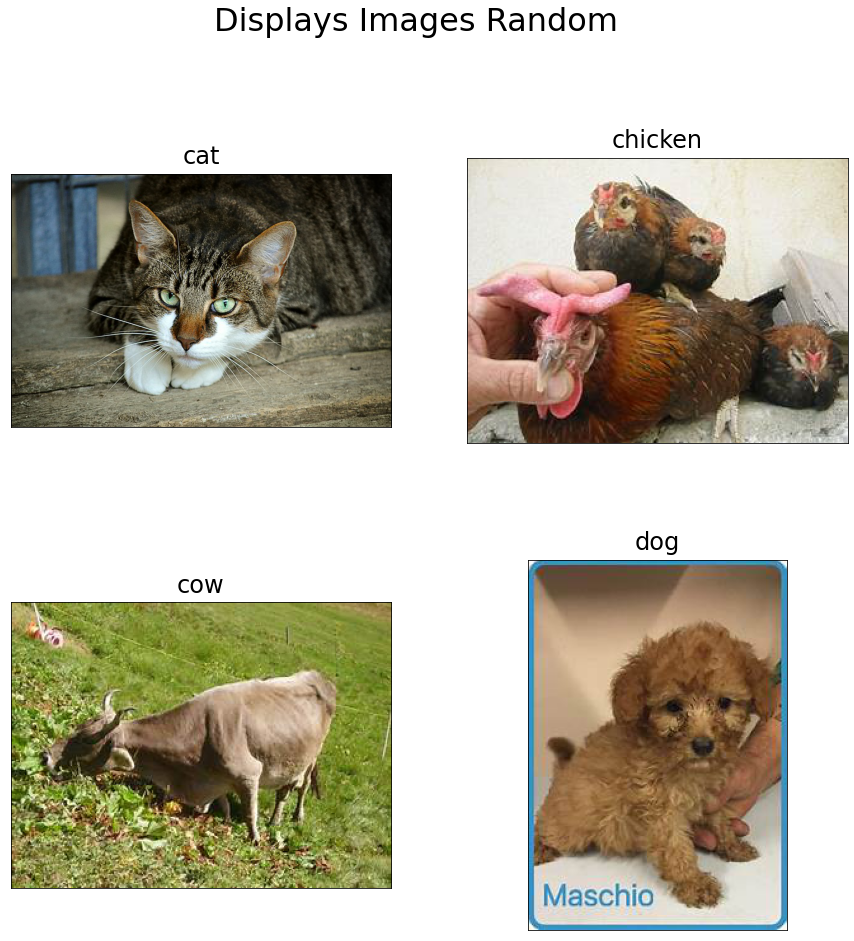

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Displays Images Random", fontsize=32)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id]
      animals_id += 1
    except:
      break
    if animals_selected =='.TEMP':
      continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=24)

plt.setp(ax, xticks=[], yticks=[])
plt.show

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [14]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 9198 images belonging to 4 classes.
Found 2297 images belonging to 4 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras import applications, optimizers

tf.device('device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
history = model.fit(data_train, 
                    epochs = 40, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks=[callbacks])

Epoch 1/40
35/35 [==============================] - 76s 2s/step - loss: 1.2078 - accuracy: 0.4838 - val_loss: 1.1852 - val_accuracy: 0.4868
Epoch 3/40
35/35 [==============================] - 76s 2s/step - loss: 1.1089 - accuracy: 0.5437 - val_loss: 1.1326 - val_accuracy: 0.5244
Epoch 4/40
35/35 [==============================] - 75s 2s/step - loss: 1.0444 - accuracy: 0.5665 - val_loss: 0.9744 - val_accuracy: 0.5850
Epoch 5/40
35/35 [==============================] - 75s 2s/step - loss: 0.9961 - accuracy: 0.5981 - val_loss: 0.9507 - val_accuracy: 0.6064
Epoch 6/40
35/35 [==============================] - 76s 2s/step - loss: 0.9704 - accuracy: 0.6060 - val_loss: 0.9096 - val_accuracy: 0.6118
Epoch 7/40
35/35 [==============================] - 77s 2s/step - loss: 0.9303 - accuracy: 0.6292 - val_loss: 0.8891 - val_accuracy: 0.6416
Epoch 8/40
35/35 [==============================] - 77s 2s/step - loss: 0.9065 - accuracy: 0.6378 - val_loss: 0.8504 - val_accuracy: 0.6533
Epoch 9/40
35/35 [==

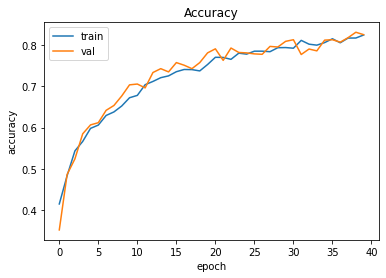

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

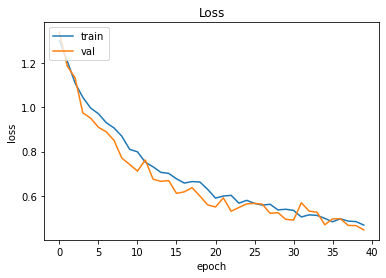

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpd0c3rzyt/assets


In [21]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900684 Jul 10 06:07 model.tflite
